In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import scipy as sp

In [3]:
ls

First_Notebook.ipynb   test.csv
sample_submission.csv  train.csv


# loading data to Python

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [6]:
df_test = pd.read_csv('test.csv')

In [7]:
df_test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [76]:
df_submission = pd.read_csv('sample_submission.csv')

In [77]:
df_submission.head()

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


# Listing up columns existing in the train data

In [15]:
df_train.columns.values

array(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12',
       'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin',
       'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_

In [16]:
columns = df_train.columns.values

#  Examine data shpes

In [17]:
df_train.shape

(595212, 59)

In [18]:
df_test.shape

(892816, 58)

In [86]:
df_submission.shape

(892816, 2)

# Split the the train dataset:  df_1(target =1) and df_0(target=0)

In [19]:
from scipy import stats

In [20]:
df_0 = df_train[df_train.target == 0]

In [21]:
df_1 = df_train[df_train.target == 1]

# Plot the distribution of each colunm value:  calculate p-values between df_1 and df_0 for each column to sort out usueful column for the prediction

In [22]:
%matplotlib inline

p-value:
0.000691266945389


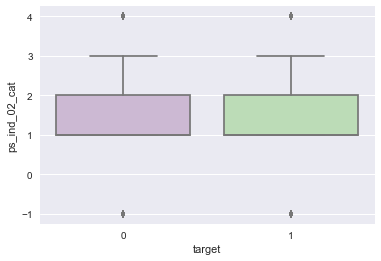

In [28]:
sns.boxplot(x = 'target', y=columns[3], data=df_train, palette="PRGn")
print('p-value:')
print(stats.ttest_ind(df_0[columns[3]], df_1[columns[3]], equal_var = False)[1])

ps_ind_03
p-value:
4.35264550858e-10


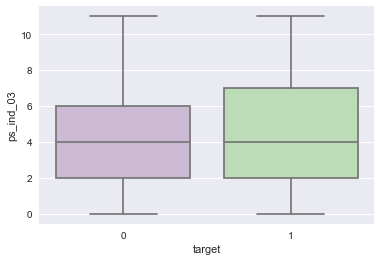

In [30]:
n = 4

sns.boxplot(x = 'target', y=columns[n], data=df_train, palette="PRGn")
print(columns[n])
print('p-value:')
print(stats.ttest_ind(df_0[columns[n]], df_1[columns[n]], equal_var = False)[1])

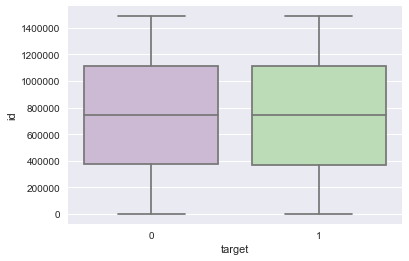

id
p-value:
0.884615403112
 


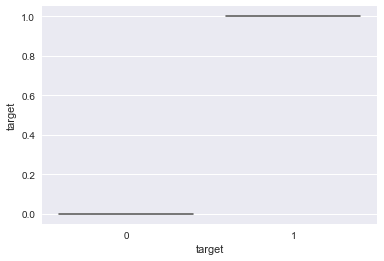

target
p-value:
0.0
 


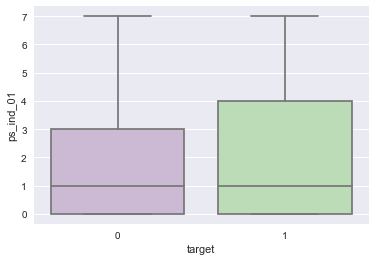

ps_ind_01
p-value:
6.11324647421e-44
 


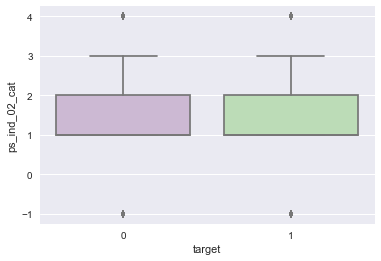

ps_ind_02_cat
p-value:
0.000691266945389
 


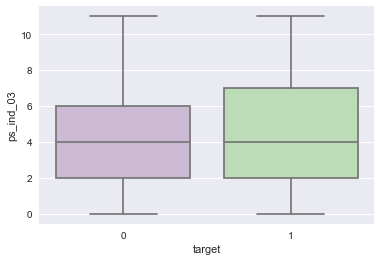

ps_ind_03
p-value:
4.35264550858e-10
 


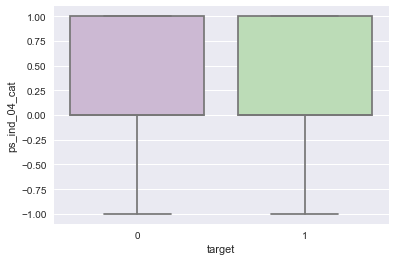

ps_ind_04_cat
p-value:
9.94763905019e-13
 


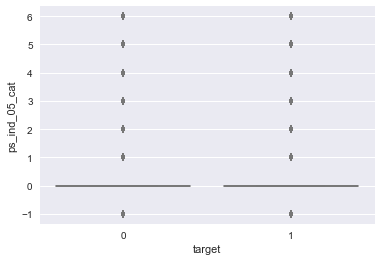

ps_ind_05_cat
p-value:
1.58385356585e-76
 


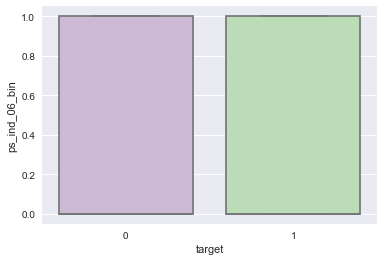

ps_ind_06_bin
p-value:
2.85546014871e-166
 


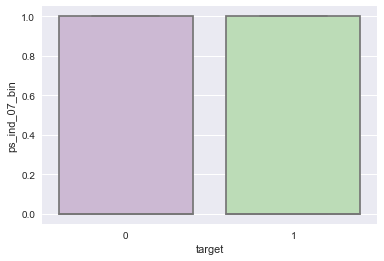

ps_ind_07_bin
p-value:
3.58733416178e-131
 


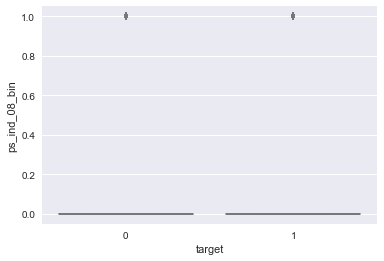

ps_ind_08_bin
p-value:
7.88772829495e-22
 


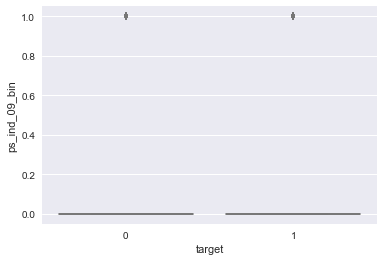

ps_ind_09_bin
p-value:
4.75955935841e-11
 


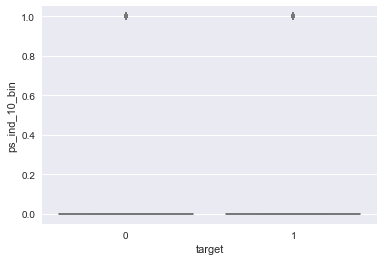

ps_ind_10_bin
p-value:
0.247320782878
 


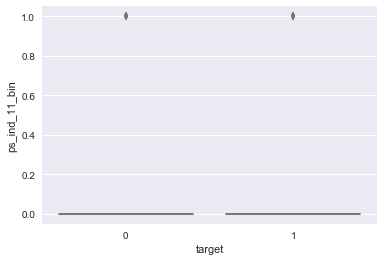

ps_ind_11_bin
p-value:
0.160534198527
 


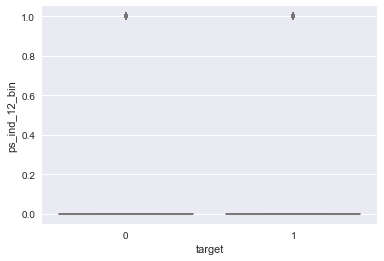

ps_ind_12_bin
p-value:
3.25016804617e-07
 


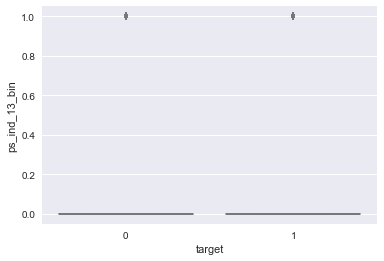

ps_ind_13_bin
p-value:
0.108020836298
 


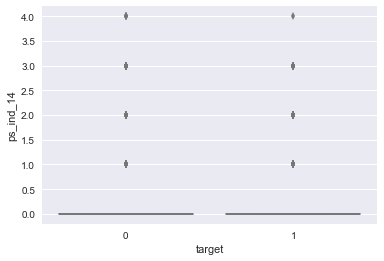

ps_ind_14
p-value:
1.47269073517e-06
 


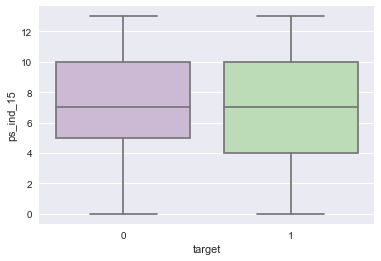

ps_ind_15
p-value:
4.45214498954e-61
 


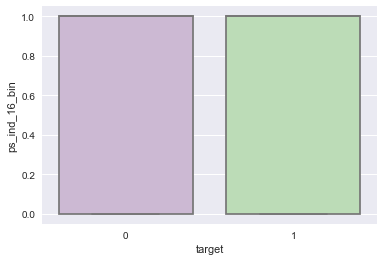

ps_ind_16_bin
p-value:
3.57478270297e-94
 


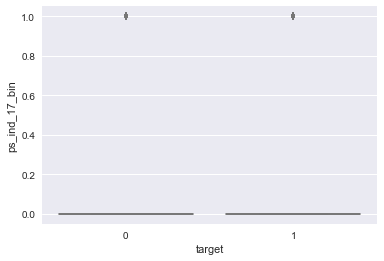

ps_ind_17_bin
p-value:
3.63666980627e-128
 


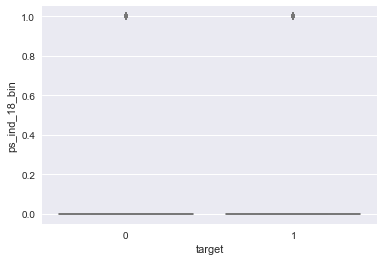

ps_ind_18_bin
p-value:
0.000579387462346
 


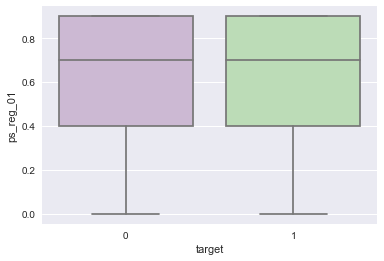

ps_reg_01
p-value:
3.54988976835e-74
 


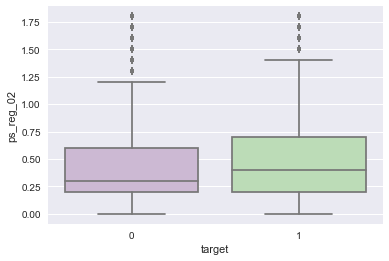

ps_reg_02
p-value:
2.94695752107e-132
 


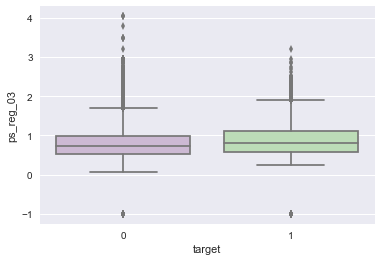

ps_reg_03
p-value:
4.94664296548e-135
 


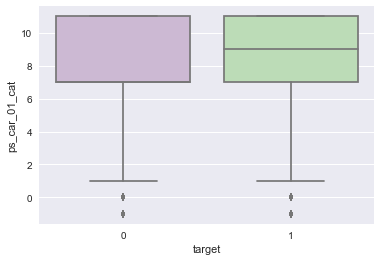

ps_car_01_cat
p-value:
2.2043051366e-33
 


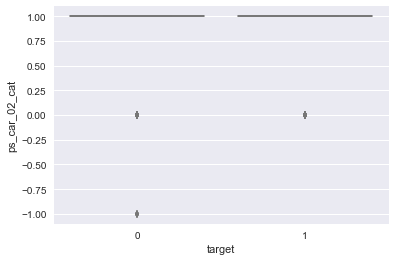

ps_car_02_cat
p-value:
4.80320365771e-104
 


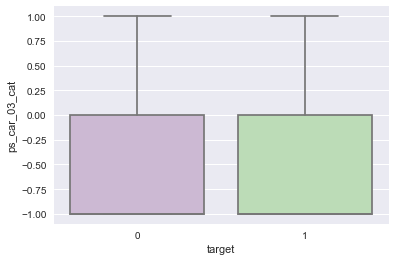

ps_car_03_cat
p-value:
1.40364442223e-117
 


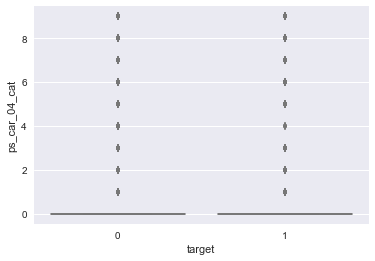

ps_car_04_cat
p-value:
5.05377334464e-98
 


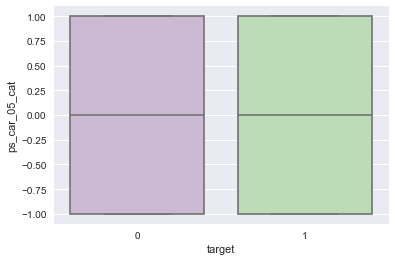

ps_car_05_cat
p-value:
7.51115770403e-58
 


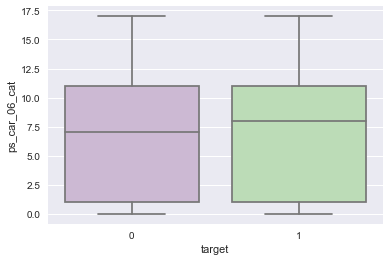

ps_car_06_cat
p-value:
9.82918086082e-19
 


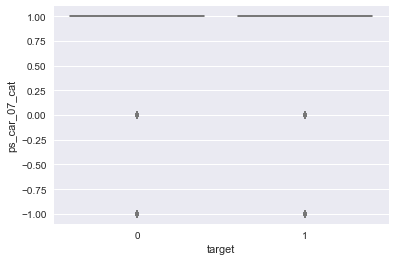

ps_car_07_cat
p-value:
2.57252859622e-99
 


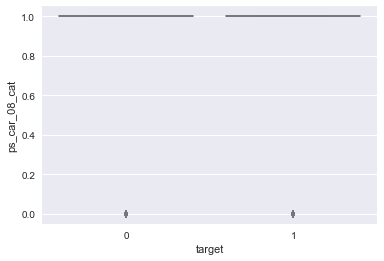

ps_car_08_cat
p-value:
1.48040760284e-47
 


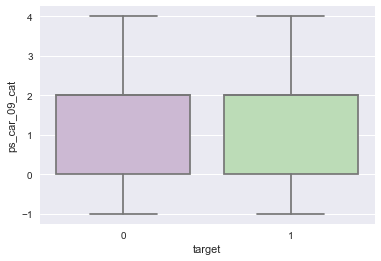

ps_car_09_cat
p-value:
3.09675003501e-05
 


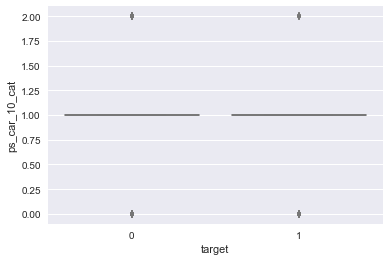

ps_car_10_cat
p-value:
0.411416154371
 


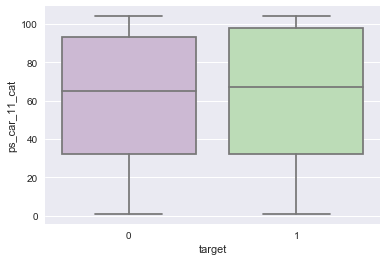

ps_car_11_cat
p-value:
3.23432323829e-06
 


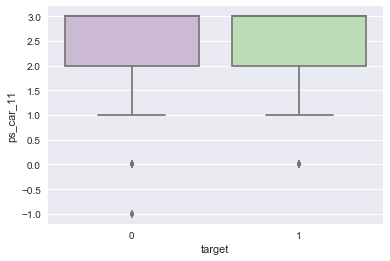

ps_car_11
p-value:
0.356810425765
 


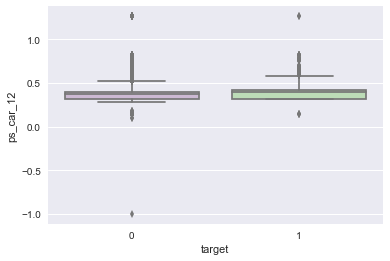

ps_car_12
p-value:
9.37572809541e-165
 


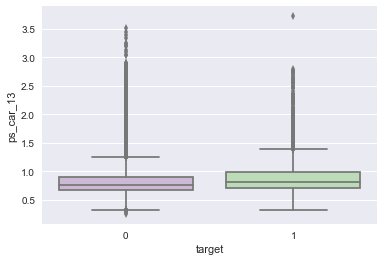

ps_car_13
p-value:
1.28790783158e-273
 


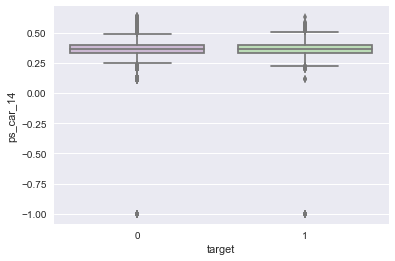

ps_car_14
p-value:
0.00100899177922
 


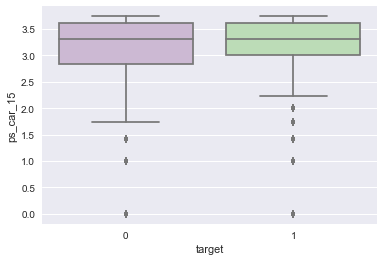

ps_car_15
p-value:
2.15712731715e-127
 


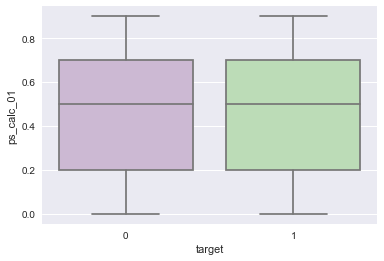

ps_calc_01
p-value:
0.168271999125
 


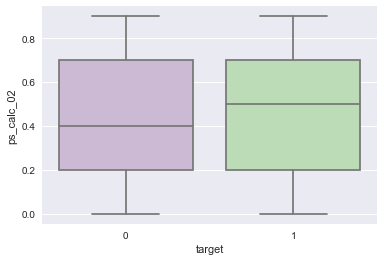

ps_calc_02
p-value:
0.291268685916
 


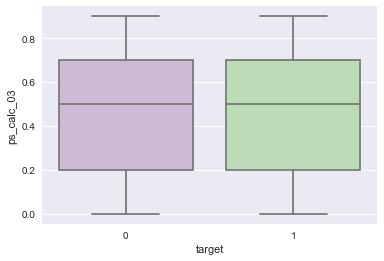

ps_calc_03
p-value:
0.139880631009
 


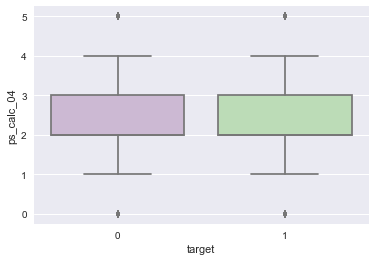

ps_calc_04
p-value:
0.97984596792
 


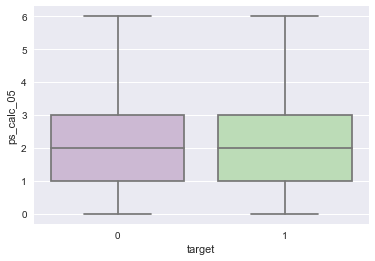

ps_calc_05
p-value:
0.553752616985
 


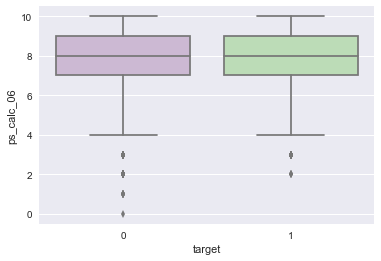

ps_calc_06
p-value:
0.949450281883
 


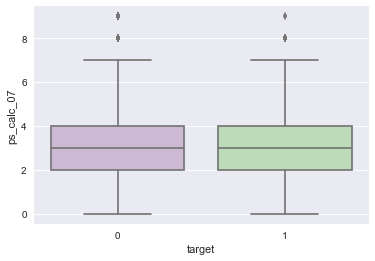

ps_calc_07
p-value:
0.936765839644
 


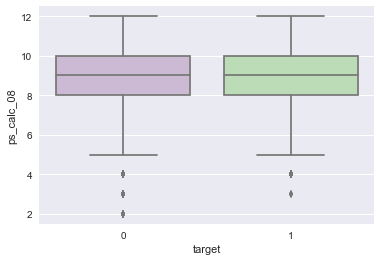

ps_calc_08
p-value:
0.43899568635
 


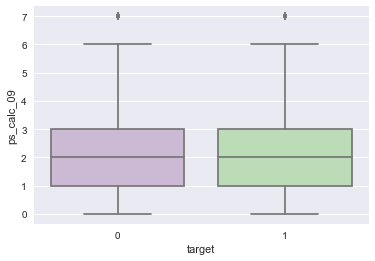

ps_calc_09
p-value:
0.577927034814
 


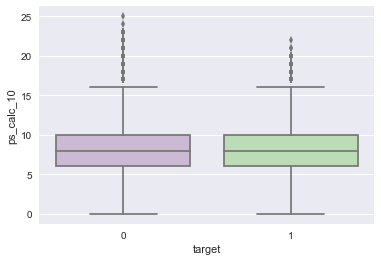

ps_calc_10
p-value:
0.412374262331
 


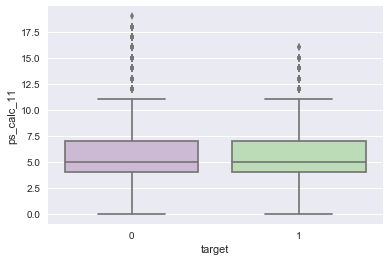

ps_calc_11
p-value:
0.776155562916
 


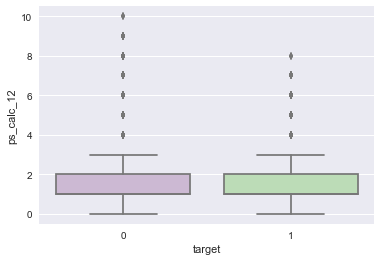

ps_calc_12
p-value:
0.381213231251
 


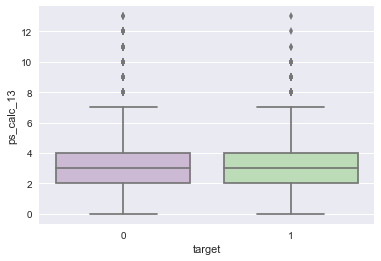

ps_calc_13
p-value:
0.73033522942
 


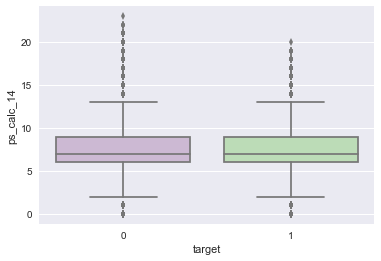

ps_calc_14
p-value:
0.294110419343
 


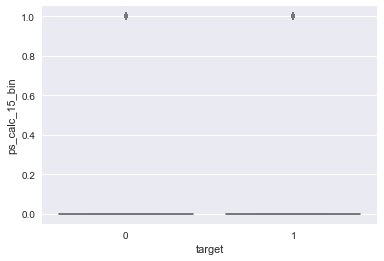

ps_calc_15_bin
p-value:
0.70438177849
 


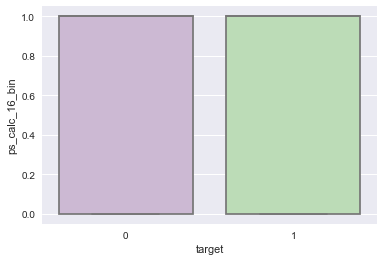

ps_calc_16_bin
p-value:
0.630046182148
 


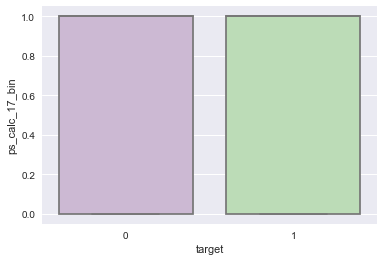

ps_calc_17_bin
p-value:
0.895587416645
 


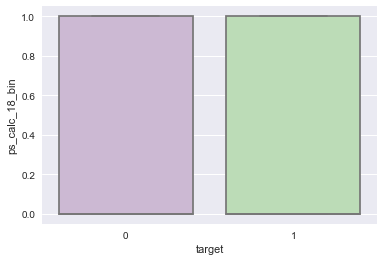

ps_calc_18_bin
p-value:
0.670367543967
 


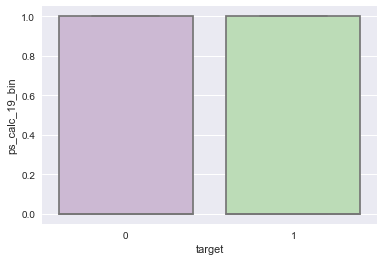

ps_calc_19_bin
p-value:
0.177324348103
 


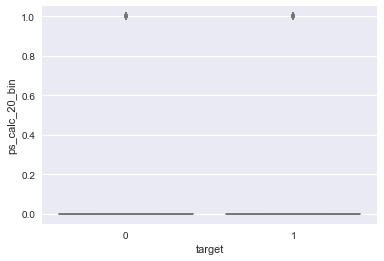

ps_calc_20_bin
p-value:
0.405715134492
 


In [37]:
for n in range(len(columns)):
    sns.boxplot(x = 'target', y=columns[n], data=df_train, palette="PRGn")
    plt.show()
    print(columns[n])
    print('p-value:')
    print(stats.ttest_ind(df_0[columns[n]], df_1[columns[n]], equal_var = False)[1])
    print(" ")

# list up columns which have smaller than 0.05 p-value

In [39]:
results = {}
selected_columns =[]

In [40]:
selected_columns =[]
for item in columns:
    if not item == 'id':
        if not item =='target':
            print(item)
            print(stats.ttest_ind(df_0[item], df_1[item], equal_var = False)[1]) 
            results[item] = stats.ttest_ind(df_0[item], df_1[item], equal_var = False)[1]
            if stats.ttest_ind(df_0[item], df_1[item], equal_var = False)[1] < 0.05:
                selected_columns.append(item)

ps_ind_01
6.11324647421e-44
ps_ind_02_cat
0.000691266945389
ps_ind_03
4.35264550858e-10
ps_ind_04_cat
9.94763905019e-13
ps_ind_05_cat
1.58385356585e-76
ps_ind_06_bin
2.85546014871e-166
ps_ind_07_bin
3.58733416178e-131
ps_ind_08_bin
7.88772829495e-22
ps_ind_09_bin
4.75955935841e-11
ps_ind_10_bin
0.247320782878
ps_ind_11_bin
0.160534198527
ps_ind_12_bin
3.25016804617e-07
ps_ind_13_bin
0.108020836298
ps_ind_14
1.47269073517e-06
ps_ind_15
4.45214498954e-61
ps_ind_16_bin
3.57478270297e-94
ps_ind_17_bin
3.63666980627e-128
ps_ind_18_bin
0.000579387462346
ps_reg_01
3.54988976835e-74
ps_reg_02
2.94695752107e-132
ps_reg_03
4.94664296548e-135
ps_car_01_cat
2.2043051366e-33
ps_car_02_cat
4.80320365771e-104
ps_car_03_cat
1.40364442223e-117
ps_car_04_cat
5.05377334464e-98
ps_car_05_cat
7.51115770403e-58
ps_car_06_cat
9.82918086082e-19
ps_car_07_cat
2.57252859622e-99
ps_car_08_cat
1.48040760284e-47
ps_car_09_cat
3.09675003501e-05
ps_car_10_cat
0.411416154371
ps_car_11_cat
3.23432323829e-06
ps_car_11


In [41]:
df = pd.DataFrame(list(results.items()),columns=['column', 'pvalue'] )

In [42]:
df.head()

,column,pvalue
0,ps_ind_01,6.113246e-44
1,ps_ind_02_cat,6.912669e-04
2,ps_ind_03,4.352646e-10
3,ps_ind_04_cat,9.947639e-13
4,ps_ind_05_cat,1.583854e-76


In [44]:
df[df.pvalue<= 0.05].head()

,column,pvalue
0,ps_ind_01,6.113246e-44
1,ps_ind_02_cat,6.912669e-04
2,ps_ind_03,4.352646e-10
3,ps_ind_04_cat,9.947639e-13
4,ps_ind_05_cat,1.583854e-76


# Slice the train dataset and collect only columns which have smaller than 0.05 p-value 

In [49]:
df_select = df_train[selected_columns]

In [50]:
df_select.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_12_bin,...,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_11_cat,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,2,2,5,1,0,0,1,0,0,0,...,1,4,1,0,0,12,0.400000,0.883679,0.370810,3.605551
1,1,1,7,0,0,0,0,1,0,0,...,-1,11,1,1,2,19,0.316228,0.618817,0.388716,2.449490
2,5,4,9,1,0,0,0,1,0,0,...,-1,14,1,1,2,60,0.316228,0.641586,0.347275,3.316625
3,0,1,2,0,0,1,0,0,0,0,...,1,11,1,1,3,104,0.374166,0.542949,0.294958,2.000000
4,0,2,0,1,0,1,0,0,0,0,...,-1,14,1,1,2,82,0.316070,0.565832,0.365103,2.000000


# As a first attempt, I will simply use Random Forest Regressor 

In [54]:
x_train = df_select.values

In [60]:
y_label = df_train.target

In [56]:
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV



In [57]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_label, test_size=0.2, random_state=1)

In [62]:
tuned_parameters = [{'n_estimators': [200,250,300,350,400]}]



In [63]:
clf1 = RandomForestRegressor()

In [64]:
clf = GridSearchCV(clf1, tuned_parameters)

In [65]:
clf.fit(Xtrain,ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [200, 250, 300, 350, 400]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [66]:
clf.best_params_

{'n_estimators': 400}

In [70]:
clf.predict(x_train)

array([ 0.04  ,  0.0125,  0.01  , ...,  0.01  ,  0.005 ,  0.015 ])

In [87]:
clf_reslt = clf.predict(x_train)

# Internal evaluation

#  Normalized gini calculation adobped from the Kaggle site here

In [82]:
import numpy as np

def gini(list_of_values):
  sorted_list = sorted(list(list_of_values))
  height, area = 0, 0
  for value in sorted_list:
    height += value
    area += height - value / 2.
  fair_area = height * len(list_of_values) / 2
  return (fair_area - area) / fair_area
  
def normalized_gini(y_pred, y):
    normalized_gini = gini(y_pred)/gini(y)
    return normalized_gini
    

predicted_y = np.random.randint(100, size = 1000)
desired_y = np.random.randint(100, size = 1000)

print (normalized_gini(predicted_y, desired_y))

0.999353873483


In [88]:
print (normalized_gini(clf_reslt, y_label.values))

0.713312958341


##   0.713312958341 is the internal evaluation score

##  Based on this model, test data will be predicted

In [71]:
x_test = df_test[selected_columns].values

In [72]:
results = clf.predict(x_test)

In [73]:
results

array([ 0.05  ,  0.01  ,  0.0325, ...,  0.06  ,  0.0075,  0.035 ])

## Make a submission file

In [78]:
df_submission.head()

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


In [79]:
df_submission['target']= results

In [80]:
df_submission.head()

,id,target
0,0,0.0500
1,1,0.0100
2,2,0.0325
3,3,0.0075
4,4,0.0350


In [81]:
df_submission.to_csv('fist_result_rfr_1.csv', index = False)

#  scored 0.179 at Kaggle